In [1]:
# Import dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read the API data
url="http://127.0.0.1:5000/fire_incidents"
response=requests.get(url).json()

In [20]:
#print the first row of the data desired
print(response['features'][1]['properties'])

{'Area_of_Origin': '55 - Mechanical/Electrical Services Room', 'Building_Status': '01 - Normal (no change)', 'Business_Impact': '2 - May resume operations within a week', 'Civilian_Casualties': 0, 'Count_of_Persons_Rescued': 0, 'Estimated_Dollar_Loss': 100000, 'Estimated_Number_Of_Persons_Displaced': 0, 'Exposures': None, 'Ext_agent_app_or_defer_time': '2018-02-27T10:57:32', 'Extent_Of_Fire': '2 - Confined to part of room/area of origin', 'Final_Incident_Type': '01 - Fire', 'Fire_Alarm_System_Impact_on_Evacuation': '2 - Some persons (at risk) evacuated as a result of hearing fire alarm system', 'Fire_Alarm_System_Operation': '1 - Fire alarm system operated', 'Fire_Alarm_System_Presence': '1 -  Fire alarm system present', 'Fire_Under_Control_Time': '2018-02-27T11:36:09', 'Ignition_Source': '23 - Distribution Equipment (includes panel boards, fuses, circuit br', 'Incident_Number': 'F18021837', 'Incident_Station_Area': 231, 'Incident_Ward': 24, 'Initial_CAD_Event_Type': 'Alarm Highrise Re

In [26]:
#Make a list comprehension to get the data
data=[response['features'][i]['properties'] for i in range(len(response['features']))]

#Create a dataframe from the data
df=pd.DataFrame(data)

#Print the first 5 rows of the dataframe
df

,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,Extent_Of_Fire,...,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties,_id
0,None,None,None,0.0,0.0,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,2018-02-26T18:04:25,2018-02-26T18:08:07,0.0,789131
1,55 - Mechanical/Electrical Services Room,01 - Normal (no change),2 - May resume operations within a week,0.0,0.0,100000.0,0.0,NaN,2018-02-27T10:57:32,2 - Confined to part of room/area of origin,...,98 - Not applicable: Alarm operated OR presenc...,8 - Not applicable - no smoke alarm or presenc...,"7 - Spread to other floors, confined to building",8 - Not applicable - no sprinkler system present,3 - No sprinkler system,2 - Fire with no evidence from street,2018-02-27T10:28:12,2018-02-27T10:35:13,0.0,789128
2,None,None,None,0.0,0.0,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,2018-02-25T18:20:43,2018-02-25T18:26:19,0.0,789125
3,None,None,None,0.0,0.0,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,2018-02-25T13:29:59,2018-02-25T13:36:49,0.0,789123
4,None,None,None,0.0,0.0,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,2018-03-03T12:49:39,2018-03-03T12:55:21,0.0,789135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25855,None,None,None,0.0,0.0,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,2021-06-22T18:25:00,2021-06-22T18:31:44,0.0,814936
25856,None,None,None,0.0,0.0,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,2021-08-15T07:52:43,2021-08-15T07:57:50,0.0,814942
25857,None,None,None,NaN,NaN,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,2021-06-23T02:38:48,2021-06-23T02:43:56,NaN,814953
25858,None,None,None,0.0,0.0,NaN,NaN,NaN,None,None,...,None,None,None,None,None,None,2021-08-27T13:36:03,2021-08-27T13:41:51,0.0,814969


In [27]:
#Clean Up the database by dropping the following columns: Ext_agent_app_or_defer_time and 'Incident_Number'.

df.drop(columns=['Ext_agent_app_or_defer_time', 'Incident_Number'], inplace=True)

df.head()

,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Extent_Of_Fire,Final_Incident_Type,...,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties,_id
0,None,None,None,0.0,0.0,NaN,NaN,NaN,None,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",...,None,None,None,None,None,None,2018-02-26T18:04:25,2018-02-26T18:08:07,0.0,789131
1,55 - Mechanical/Electrical Services Room,01 - Normal (no change),2 - May resume operations within a week,0.0,0.0,100000.0,0.0,NaN,2 - Confined to part of room/area of origin,01 - Fire,...,98 - Not applicable: Alarm operated OR presenc...,8 - Not applicable - no smoke alarm or presenc...,"7 - Spread to other floors, confined to building",8 - Not applicable - no sprinkler system present,3 - No sprinkler system,2 - Fire with no evidence from street,2018-02-27T10:28:12,2018-02-27T10:35:13,0.0,789128
2,None,None,None,0.0,0.0,NaN,NaN,NaN,None,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",...,None,None,None,None,None,None,2018-02-25T18:20:43,2018-02-25T18:26:19,0.0,789125
3,None,None,None,0.0,0.0,NaN,NaN,NaN,None,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",...,None,None,None,None,None,None,2018-02-25T13:29:59,2018-02-25T13:36:49,0.0,789123
4,None,None,None,0.0,0.0,NaN,NaN,NaN,None,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",...,None,None,None,None,None,None,2018-03-03T12:49:39,2018-03-03T12:55:21,0.0,789135


In [28]:
#print the unique values of Incident_Ward column
df['Incident_Ward'].unique()


array([20., 24.,  8., 21.,  5., 18.,  1.,  4., 10., 25., 22., 19., 13.,
        6.,  7., 17., 12., 14.,  9.,  3., 16., 11.,  2., 23., 15., nan,
        0., 37., 33., 30., 28., 42., 39., 27., 29., 32., 34., 41., 38.,
       43., 31., 40., 26., 35., 44., 36.])

In [29]:
#check the data types of the columns
df.dtypes



Area_of_Origin                                                    object
Building_Status                                                   object
Business_Impact                                                   object
Civilian_Casualties                                              float64
Count_of_Persons_Rescued                                         float64
Estimated_Dollar_Loss                                            float64
Estimated_Number_Of_Persons_Displaced                            float64
Exposures                                                        float64
Extent_Of_Fire                                                    object
Final_Incident_Type                                               object
Fire_Alarm_System_Impact_on_Evacuation                            object
Fire_Alarm_System_Operation                                       object
Fire_Alarm_System_Presence                                        object
Fire_Under_Control_Time                            

In [34]:
#Group the data by the "Incident_Ward" column and calculate the total number of incidents per ward and the total dollar loss per ward
df_grouped = df.groupby(['Incident_Ward']).agg({'Estimated_Dollar_Loss': ['sum', 'count']})

#sort the data by the total number of incidents per ward
df_grouped.sort_values(by=('Estimated_Dollar_Loss', 'count'), ascending=False, inplace=True)

df_grouped.head(25)

Estimated_Dollar_Loss      
                                sum count
Incident_Ward                            
7.0                      39188859.0  1049
20.0                     27958294.0   941
5.0                      76088811.0   778
11.0                     30396444.0   740
1.0                      22968001.0   714
13.0                     23738978.0   702
6.0                      21015993.0   663
8.0                      17662183.0   654
10.0                     14245869.0   651
14.0                     20075583.0   645
2.0                      36561287.0   643
27.0                     12386998.0   618
19.0                     16605516.0   591
9.0                      17431885.0   544
28.0                      9038140.0   530
3.0                      24140455.0   530
4.0                      14226803.0   526
25.0                     28549859.0   497
15.0                     35579948.0   493
12.0                     10835268.0   488
21.0                     20766269.0   487
18.0                     15493356.0   476
17.0                     14681139.0   469
24.0                     13874307.0   450
23.0                     16294826.0   448

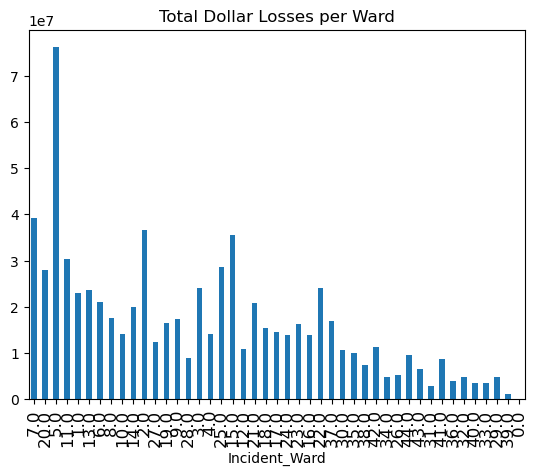

In [35]:
#Create a bar chart of the total dollar losses per ward
import matplotlib.pyplot as plt
import numpy as np
df_grouped.plot(kind='bar', y=('Estimated_Dollar_Loss', 'sum'), title='Total Dollar Losses per Ward', legend=False)

figsize=(15, 20)
plt.xticks(fontsize=12)

plt.show()


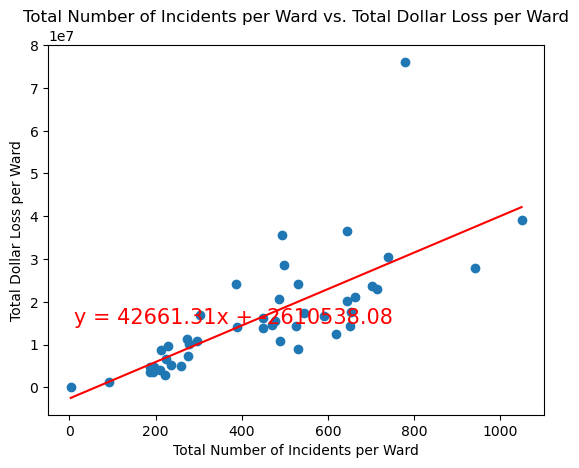

In [36]:
#Conduct a linear regression on the total number of incidents per ward and the total dollar loss per ward
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_grouped[('Estimated_Dollar_Loss', 'count')], df_grouped[('Estimated_Dollar_Loss', 'sum')])
regress_values = df_grouped[('Estimated_Dollar_Loss', 'count')] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create a scatter plot of the total number of incidents per ward and the total dollar loss per ward
plt.scatter(df_grouped[('Estimated_Dollar_Loss', 'count')], df_grouped[('Estimated_Dollar_Loss', 'sum')])
plt.plot(df_grouped[('Estimated_Dollar_Loss', 'count')],regress_values,"r-")
plt.annotate(line_eq,(10,15000000),fontsize=15,color="red")
plt.xlabel('Total Number of Incidents per Ward')
plt.ylabel('Total Dollar Loss per Ward')
plt.title('Total Number of Incidents per Ward vs. Total Dollar Loss per Ward')
plt.show()


In [37]:
#Give me the r squared value and p value for the correlation between the total number of incidents per ward and the total dollar loss per ward
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")



The r-squared is: 0.5368393420835639
The p-value is: 1.0544178787279814e-08


In [38]:
#Group the df by ward and calculate the average dollar loss per incident per ward and the total number of incidents per ward
df_grouped2 = df.groupby(['Incident_Ward']).agg({'Estimated_Dollar_Loss': ['mean', 'count']})

#Sort the data by the total number of incidents per ward
df_grouped2.sort_values(by=('Estimated_Dollar_Loss', 'count'), ascending=True, inplace=True)

df_grouped2.head()


Estimated_Dollar_Loss      
                               mean count
Incident_Ward                            
0.0                    16866.666667     3
39.0                   13661.956522    92
33.0                   19162.673797   187
29.0                   25797.737968   187
40.0                   18937.419689   193

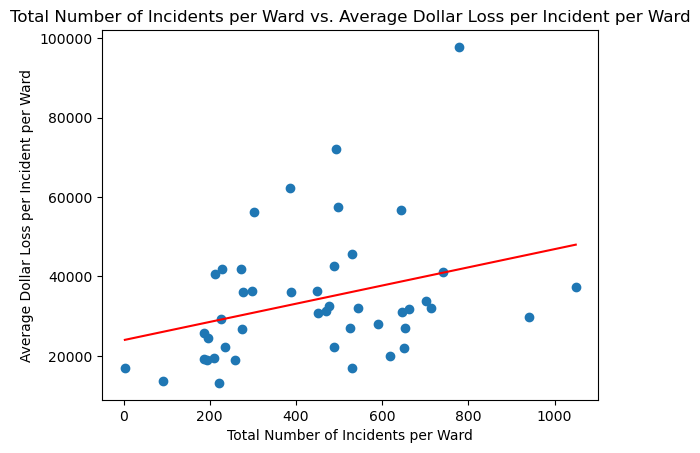

In [39]:
#Conduct a linear regression on the total number of incidents per ward and the average dollar loss per ward

(slope, intercept, rvalue, pvalue, stderr) = linregress(df_grouped2[('Estimated_Dollar_Loss', 'count')], df_grouped2[('Estimated_Dollar_Loss', 'mean')])
regress_values = df_grouped2[('Estimated_Dollar_Loss', 'count')] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create a scatter plot of the total number of incidents per ward and the average dollar loss per ward
plt.scatter(df_grouped2[('Estimated_Dollar_Loss', 'count')], df_grouped2[('Estimated_Dollar_Loss', 'mean')])
plt.plot(df_grouped2[('Estimated_Dollar_Loss', 'count')],regress_values,"r-")
plt.annotate(line_eq,(10,15000000),fontsize=15,color="red")
plt.xlabel('Total Number of Incidents per Ward')
plt.ylabel('Average Dollar Loss per Incident per Ward')
plt.title('Total Number of Incidents per Ward vs. Average Dollar Loss per Incident per Ward')
plt.show()


In [40]:
#Give me the r value and p value for the correlation between the total number of incidents per ward and the total dollar loss per ward
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

The r-squared is: 0.10325174003531841
The p-value is: 0.031372378323429366


In [41]:
#Remove the rows where the TFS_Alarm_Time & Fire_Under_Control_Time columns are equal to 0 or null
df_grouped3 = df[df['TFS_Alarm_Time'] != 0]
df_grouped3 = df_grouped3[df_grouped3['Fire_Under_Control_Time'] != 0]
df_grouped3 = df_grouped3[df_grouped3['TFS_Alarm_Time'].notna()]
df_grouped3 = df_grouped3[df_grouped3['Fire_Under_Control_Time'].notna()]

#Change the TFS_Alarm_Time and Fire_Under_Control_Time columns to datetime so that we can calculate the time it took to put out the fire
df_grouped3['TFS_Alarm_Time'] = pd.to_datetime(df_grouped3['TFS_Alarm_Time'])
df_grouped3['Fire_Under_Control_Time'] = pd.to_datetime(df_grouped3['Fire_Under_Control_Time'])

#Create a new column that calculates the time it took to put out the fire
df_grouped3['Time_to_put_out_fire'] = (df_grouped3['Fire_Under_Control_Time'] - df_grouped3['TFS_Alarm_Time']).dt.total_seconds()





df_grouped3.head()

,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Extent_Of_Fire,Final_Incident_Type,...,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties,_id,Time_to_put_out_fire
1,55 - Mechanical/Electrical Services Room,01 - Normal (no change),2 - May resume operations within a week,0.0,0.0,100000.0,0.0,NaN,2 - Confined to part of room/area of origin,01 - Fire,...,8 - Not applicable - no smoke alarm or presenc...,"7 - Spread to other floors, confined to building",8 - Not applicable - no sprinkler system present,3 - No sprinkler system,2 - Fire with no evidence from street,2018-02-27 10:28:12,2018-02-27T10:35:13,0.0,789128,4077.0
5,"75 - Trash, rubbish area (outside)",None,None,0.0,0.0,50.0,NaN,NaN,None,01 - Fire,...,None,None,None,None,2 - Fire with no evidence from street,2018-02-24 21:24:43,2018-02-24T21:29:31,0.0,789122,461.0
6,81 - Engine Area,None,None,0.0,0.0,15000.0,NaN,NaN,None,01 - Fire,...,None,None,None,None,"7 - Fully involved (total structure, vehicle, ...",2018-02-24 21:04:29,2018-02-24T21:10:11,0.0,789121,671.0
10,28 - Office,01 - Normal (no change),1 - No business interruption,0.0,0.0,5000.0,0.0,NaN,1 - Confined to object of origin,01 - Fire,...,2 - Hardwired (standalone),"4 - Spread beyond room of origin, same floor",3 - Did not activate: fire too small to trigge...,1 - Full sprinkler system present,4 - Flames showing from small area (one storey...,2018-02-25 15:48:34,2018-02-25T15:52:04,0.0,789129,566.0
11,81 - Engine Area,None,None,0.0,0.0,1500.0,NaN,NaN,None,01 - Fire,...,None,None,None,None,4 - Flames showing from small area (one storey...,2018-02-25 18:31:19,2018-02-25T18:35:17,0.0,789126,521.0


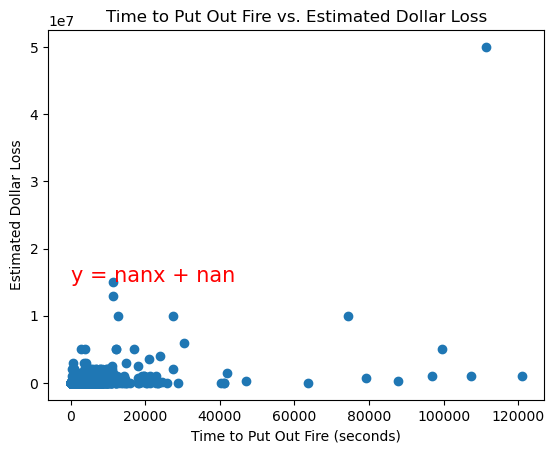

In [42]:
#Calculate the regression line for the time it took to put out the fire and the estimated dollar loss
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_grouped3['Time_to_put_out_fire'], df_grouped3['Estimated_Dollar_Loss'])
regress_values = df_grouped3['Time_to_put_out_fire'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create a scatter plot of the time it took to put out the fire and the estimated dollar loss
plt.scatter(df_grouped3['Time_to_put_out_fire'], df_grouped3['Estimated_Dollar_Loss'])
plt.plot(df_grouped3['Time_to_put_out_fire'],regress_values,"r-")
plt.annotate(line_eq,(10,15000000),fontsize=15,color="red")
plt.xlabel('Time to Put Out Fire (seconds)')
plt.ylabel('Estimated Dollar Loss')
plt.title('Time to Put Out Fire vs. Estimated Dollar Loss')
plt.show()


In [43]:
#Print the r value and p value for the correlation between the time it took to put out the fire and the estimated dollar loss
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")


The r-squared is: nan
The p-value is: nan


In [44]:
#Convert the mean column to minutes by dividing by 60
df_grouped3[('Time_to_put_out_fire', 'mean')] = df_grouped3[('Time_to_put_out_fire', 'mean')]/60

#Combine df_grouped3 with df_grouped2 to get the average dollar loss per incident per ward and the average time it took to put out the fire per ward
df = pd.merge(df_grouped2, df_grouped3, on='Incident_Ward')

#Sort the data by the average time it took to put out the fire per ward
df.sort_values(by=('Time_to_put_out_fire', 'mean'), ascending=True, inplace=True)

df.head()

KeyError: ('Time_to_put_out_fire', 'mean')

In [45]:
#Calculate the regression line for the average time it took to put out the fire per ward and the average dollar loss per incident per ward
(slope, intercept, rvalue, pvalue, stderr) = linregress(df[('Time_to_put_out_fire', 'mean')], df[('Estimated_Dollar_Loss', 'mean')])
regress_values = df[('Time_to_put_out_fire', 'mean')] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create a scatter plot of the average time it took to put out the fire per ward and the average dollar loss per incident per ward
plt.scatter(df[('Time_to_put_out_fire', 'mean')], df[('Estimated_Dollar_Loss', 'mean')])
plt.plot(df[('Time_to_put_out_fire', 'mean')],regress_values,"r-")
plt.annotate(line_eq,(10,15000000),fontsize=15,color="red")
plt.xlabel('Average Time to Put Out Fire per Ward (Minutes)')
plt.ylabel('Average Dollar Loss per Incident per Ward')
plt.title('Average Time to Put Out Fire per Ward vs. Average Dollar Loss per Incident per Ward')
plt.show()


KeyError: ('Time_to_put_out_fire', 'mean')

In [46]:
#Print the rsquared value and p value for the correlation between the average time it took to put out the fire per ward and the average dollar loss per incident per ward
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")


The r-squared is: nan
The p-value is: nan


In [47]:
#reset index for df_grouped4
df.reset_index(inplace=True)

df

,index,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Extent_Of_Fire,...,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties,_id,Time_to_put_out_fire
0,1,55 - Mechanical/Electrical Services Room,01 - Normal (no change),2 - May resume operations within a week,0.0,0.0,100000.0,0.0,NaN,2 - Confined to part of room/area of origin,...,8 - Not applicable - no smoke alarm or presenc...,"7 - Spread to other floors, confined to building",8 - Not applicable - no sprinkler system present,3 - No sprinkler system,2 - Fire with no evidence from street,2018-02-27 10:28:12,2018-02-27T10:35:13,0.0,789128,4077.0
1,5,"75 - Trash, rubbish area (outside)",None,None,0.0,0.0,50.0,NaN,NaN,None,...,None,None,None,None,2 - Fire with no evidence from street,2018-02-24 21:24:43,2018-02-24T21:29:31,0.0,789122,461.0
2,6,81 - Engine Area,None,None,0.0,0.0,15000.0,NaN,NaN,None,...,None,None,None,None,"7 - Fully involved (total structure, vehicle, ...",2018-02-24 21:04:29,2018-02-24T21:10:11,0.0,789121,671.0
3,10,28 - Office,01 - Normal (no change),1 - No business interruption,0.0,0.0,5000.0,0.0,NaN,1 - Confined to object of origin,...,2 - Hardwired (standalone),"4 - Spread beyond room of origin, same floor",3 - Did not activate: fire too small to trigge...,1 - Full sprinkler system present,4 - Flames showing from small area (one storey...,2018-02-25 15:48:34,2018-02-25T15:52:04,0.0,789129,566.0
4,11,81 - Engine Area,None,None,0.0,0.0,1500.0,NaN,NaN,None,...,None,None,None,None,4 - Flames showing from small area (one storey...,2018-02-25 18:31:19,2018-02-25T18:35:17,0.0,789126,521.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20092,25846,78 - Attached Deck,01 - Normal (no change),8 - Not applicable (not a business),0.0,0.0,3000.0,4.0,NaN,9 - Confined to roof/exterior structure,...,2 - Hardwired (standalone),9 - Confined to roof/exterior structure,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,4 - Flames showing from small area (one storey...,2021-11-28 09:48:20,2021-11-28T09:51:59,0.0,814836,370.0
20093,25849,"31 - Process Manufacturing (inc manf, prod ass...",01 - Normal (no change),2 - May resume operations within a week,0.0,0.0,5000.0,50.0,NaN,1 - Confined to object of origin,...,9 - Type undetermined,"4 - Spread beyond room of origin, same floor",3 - Did not activate: fire too small to trigge...,1 - Full sprinkler system present,2 - Fire with no evidence from street,2021-04-08 18:45:43,2021-04-08T18:50:11,0.0,814866,6865.0
20094,25850,"25 - Washroom or Bathroom (toilet,restroom/loc...",01 - Normal (no change),1 - No business interruption,0.0,0.0,1000.0,0.0,NaN,1 - Confined to object of origin,...,1 - Battery operated,2 - Confined to part of room/area of origin,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,2 - Fire with no evidence from street,2021-07-23 10:31:49,2021-07-23T10:36:36,0.0,814871,721.0
20095,25851,62 - Roof,03 - Under Construction,9 - Undetermined,0.0,0.0,10000.0,0.0,NaN,9 - Confined to roof/exterior structure,...,8 - Not applicable - no smoke alarm or presenc...,9 - Confined to roof/exterior structure,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,3 - Fire with smoke showing only - including v...,2021-07-23 16:09:10,2021-07-23T16:17:59,1.0,814875,1869.0


In [48]:
#Group the df by Area_of_Origin and calculate the average dollar loss per incident per area of origin
df_grouped5 = df.groupby(['Area_of_Origin']).agg({'Estimated_Dollar_Loss': ['mean']})

#Sort the data by the average dollar loss per incident per area of origin
df_grouped5.sort_values(by=('Estimated_Dollar_Loss', 'mean'), ascending=False, inplace=True)

df_grouped5

,Estimated_Dollar_Loss
,mean
Area_of_Origin,
990 - Under Investigation,3.527333e+06
"36 - Backstage, dressing room",3.000000e+05
91 - Multiple Areas of Origin,2.170589e+05
69 - Attic Area,1.727500e+05
68 - Concealed Wall Area,1.715189e+05
...,...
63 - Awning or Canopy,3.148000e+03
"44 - Trash, Rubbish Storage (inc garbage chute room, garbage/industri",2.987778e+03


In [49]:
#reset the index so that Area_of_Origin is a column
df_grouped5.reset_index(inplace=True)
df_grouped5.head()

,Area_of_Origin,Estimated_Dollar_Loss
,,mean
0,990 - Under Investigation,3.527333e+06
1,"36 - Backstage, dressing room",3.000000e+05
2,91 - Multiple Areas of Origin,2.170589e+05
3,69 - Attic Area,1.727500e+05
4,68 - Concealed Wall Area,1.715189e+05


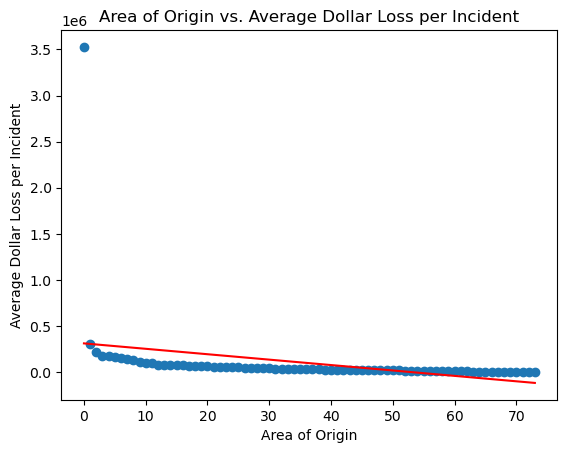

In [50]:
#Calculate the regression line for the average dollar loss per incident per area of origin
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_grouped5.index, df_grouped5[('Estimated_Dollar_Loss', 'mean')])
regress_values = df_grouped5.index * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create a scatter plot of the average dollar loss per incident per area of origin
plt.scatter(df_grouped5.index, df_grouped5[('Estimated_Dollar_Loss', 'mean')])
plt.plot(df_grouped5.index,regress_values,"r-")
plt.annotate(line_eq,(0,15000000),fontsize=15,color="red")
plt.xlabel('Area of Origin')
plt.ylabel('Average Dollar Loss per Incident')
plt.title('Area of Origin vs. Average Dollar Loss per Incident')
plt.show()


In [51]:
#Print the rsquared value and p value for the correlation between the average dollar loss per incident per area of origin
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")


The r-squared is: 0.09587070640440007
The p-value is: 0.007263689649118386


In [52]:
#Group the df by Intersection and calculate the average dollar loss per incident per intersection
df_grouped6 = df.groupby(['Intersection']).agg({'Estimated_Dollar_Loss': ['mean']})

#Sort the data by the average dollar loss per incident per intersection
df_grouped6.sort_values(by=('Estimated_Dollar_Loss', 'mean'), ascending=False, inplace=True)

df_grouped6

,Estimated_Dollar_Loss
,mean
Intersection,
Eglinton Ave W / Yarrow Rd,50000000.0
Junction Rd / Mulock Ave,10000000.0
Rippleton Rd / Terrington Crt,7504000.0
Post Rd / Park Lane Crcl / Hyde Park Crcl,5000000.0
Warden Ave / Upton Rd,5000000.0
...,...
Bloor St W / Madison Ave,NaN
Porterfield Rd / Delsing Dr,NaN


In [53]:
#reset the index
df_grouped6.reset_index(inplace=True)

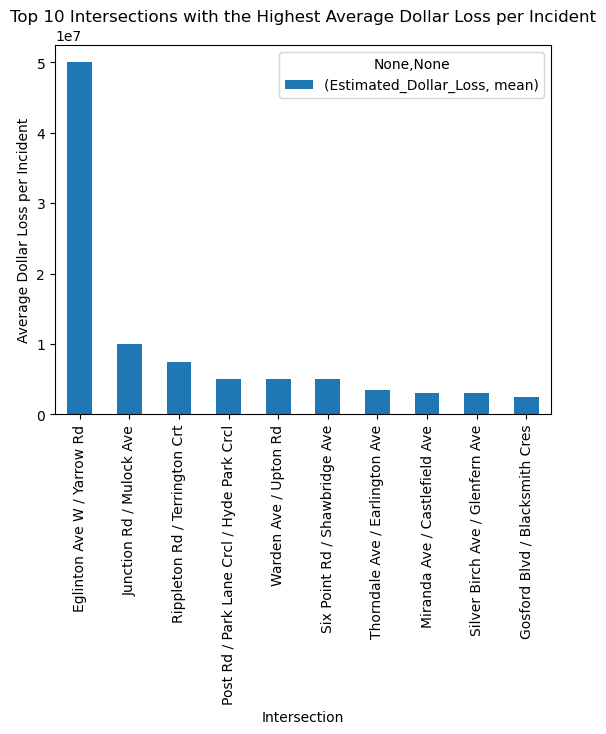

In [54]:
#Make a bar chart of the top 10 intersections with the highest average dollar loss per incident
df_grouped6.head(10).plot.bar(x='Intersection', y=('Estimated_Dollar_Loss', 'mean'), rot=90)
plt.xlabel('Intersection')
plt.ylabel('Average Dollar Loss per Incident')
plt.title('Top 10 Intersections with the Highest Average Dollar Loss per Incident')
plt.show()

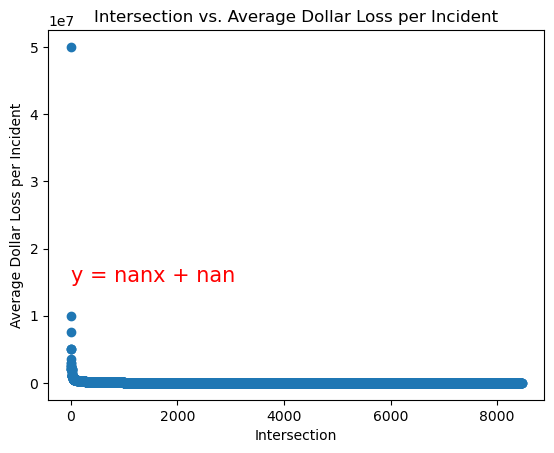

In [55]:
#Calculate the regression line for the average dollar loss per incident per intersection
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_grouped6.index, df_grouped6[('Estimated_Dollar_Loss', 'mean')])
regress_values = df_grouped6.index * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create a scatter plot of the average dollar loss per incident per intersection
plt.scatter(df_grouped6.index, df_grouped6[('Estimated_Dollar_Loss', 'mean')])
plt.plot(df_grouped6.index,regress_values,"r-")
plt.annotate(line_eq,(0,15000000),fontsize=15,color="red")
plt.xlabel('Intersection')
plt.ylabel('Average Dollar Loss per Incident')
plt.title('Intersection vs. Average Dollar Loss per Incident')
plt.show()


In [56]:
# Assigning the population density values to the different wards
df.loc[df['Incident_Ward'] == 1.0, 'Population_Density'] = 35
df.loc[df['Incident_Ward'] == 1.0, 'Ward_Name'] = "Etobicoke North"
df.loc[df['Incident_Ward'] == 2.0, 'Population_Density'] = 18
df.loc[df['Incident_Ward'] == 2.0, 'Ward_Name'] = "Etobicoke North 2"
df.loc[df['Incident_Ward'] == 3.0, 'Population_Density'] = 31
df.loc[df['Incident_Ward'] == 3.0, 'Ward_Name'] = "Etobicoke Centre"
df.loc[df['Incident_Ward'] == 4.0, 'Population_Density'] = 33
df.loc[df['Incident_Ward'] == 4.0, 'Ward_Name'] = "Etobicoke Centre 2"
df.loc[df['Incident_Ward'] == 5.0, 'Population_Density'] = 29
df.loc[df['Incident_Ward'] == 5.0, 'Ward_Name'] = "Etobicoke-Lakeshore"
df.loc[df['Incident_Ward'] == 6.0, 'Population_Density'] = 38
df.loc[df['Incident_Ward'] == 6.0, 'Ward_Name'] = "Etobiocoke-Lakeshore 2"
df.loc[df['Incident_Ward'] == 7.0, 'Population_Density'] = 26
df.loc[df['Incident_Ward'] == 7.0, 'Ward_Name'] = "York West"
df.loc[df['Incident_Ward'] == 8.0, 'Population_Density'] = 30
df.loc[df['Incident_Ward'] == 8.0, 'Ward_Name'] = "York West 2"
df.loc[df['Incident_Ward'] == 9.0, 'Population_Density'] = 31
df.loc[df['Incident_Ward'] == 9.0, 'Ward_Name'] = "York Centre"
df.loc[df['Incident_Ward'] == 10.0, 'Population_Density'] = 45
df.loc[df['Incident_Ward'] == 10.0, 'Ward_Name'] = "York Centre 2"
df.loc[df['Incident_Ward'] == 11.0, 'Population_Density'] = 48
df.loc[df['Incident_Ward'] == 11.0, 'Ward_Name'] = "York South-Weston"
df.loc[df['Incident_Ward'] == 12.0, 'Population_Density'] = 45
df.loc[df['Incident_Ward'] == 12.0, 'Ward_Name'] = "York South-Weston 2"
df.loc[df['Incident_Ward'] == 13.0, 'Population_Density'] = 55
df.loc[df['Incident_Ward'] == 13.0, 'Ward_Name'] = "Parkdale-High Park"
df.loc[df['Incident_Ward'] == 14.0, 'Population_Density'] = 102
df.loc[df['Incident_Ward'] == 14.0, 'Ward_Name'] = "Parkdale-High Park 2"
df.loc[df['Incident_Ward'] == 15.0, 'Population_Density'] = 50
df.loc[df['Incident_Ward'] == 15.0, 'Ward_Name'] = "Eglinton-Lawrence"
df.loc[df['Incident_Ward'] == 16.0, 'Population_Density'] = 53
df.loc[df['Incident_Ward'] == 16.0, 'Ward_Name'] = "Eglinton-Lawrence 2"
df.loc[df['Incident_Ward'] == 17.0, 'Population_Density'] = 77
df.loc[df['Incident_Ward'] == 17.0, 'Ward_Name'] = "Davenport"
df.loc[df['Incident_Ward'] == 18.0, 'Population_Density'] = 106
df.loc[df['Incident_Ward'] == 18.0, 'Ward_Name'] = "Davenport 2"
df.loc[df['Incident_Ward'] == 19.0, 'Population_Density'] = 97
df.loc[df['Incident_Ward'] == 19.0, 'Ward_Name'] = "Trinity-Spadina"
df.loc[df['Incident_Ward'] == 20.0, 'Population_Density'] = 127
df.loc[df['Incident_Ward'] == 20.0, 'Ward_Name'] = "Trinity-Spadina 2"
df.loc[df['Incident_Ward'] == 21.0, 'Population_Density'] = 75
df.loc[df['Incident_Ward'] == 21.0, 'Ward_Name'] = "St. Paul's"
df.loc[df['Incident_Ward'] == 22.0, 'Population_Density'] = 81
df.loc[df['Incident_Ward'] == 22.0, 'Ward_Name'] = "St. Paul's 2"
df.loc[df['Incident_Ward'] == 23.0, 'Population_Density'] = 65
df.loc[df['Incident_Ward'] == 23.0, 'Ward_Name'] = "Willowdale"
df.loc[df['Incident_Ward'] == 24.0, 'Population_Density'] = 37
df.loc[df['Incident_Ward'] == 24.0, 'Ward_Name'] = "Willowdale 2"
df.loc[df['Incident_Ward'] == 25.0, 'Population_Density'] = 25
df.loc[df['Incident_Ward'] == 25.0, 'Ward_Name'] = "Don Valley West"
df.loc[df['Incident_Ward'] == 26.0, 'Population_Density'] = 62
df.loc[df['Incident_Ward'] == 26.0, 'Ward_Name'] = "Don Valley West 2"
df.loc[df['Incident_Ward'] == 27.0, 'Population_Density'] = 107
df.loc[df['Incident_Ward'] == 27.0, 'Ward_Name'] = "Toronto Centre-Rosedale"
df.loc[df['Incident_Ward'] == 28.0, 'Population_Density'] = 83
df.loc[df['Incident_Ward'] == 28.0, 'Ward_Name'] = "Toronto Centre-Rosedale 2"
df.loc[df['Incident_Ward'] == 29.0, 'Population_Density'] = 58
df.loc[df['Incident_Ward'] == 29.0, 'Ward_Name'] = "Toronto-Danforth"
df.loc[df['Incident_Ward'] == 30.0, 'Population_Density'] = 45
df.loc[df['Incident_Ward'] == 30.0, 'Ward_Name'] = "Toronto-Danforth 2"
df.loc[df['Incident_Ward'] == 31.0, 'Population_Density'] = 61
df.loc[df['Incident_Ward'] == 31.0, 'Ward_Name'] = "Beaches-East York"
df.loc[df['Incident_Ward'] == 32.0, 'Population_Density'] = 62
df.loc[df['Incident_Ward'] == 32.0, 'Ward_Name'] = "Beaches-East York 2"
df.loc[df['Incident_Ward'] == 33.0, 'Population_Density'] = 57
df.loc[df['Incident_Ward'] == 33.0, 'Ward_Name'] = "Don Valley East"
df.loc[df['Incident_Ward'] == 34.0, 'Population_Density'] = 37
df.loc[df['Incident_Ward'] == 34.0, 'Ward_Name'] = "Don Valley East 2"
df.loc[df['Incident_Ward'] == 35.0, 'Population_Density'] = 48
df.loc[df['Incident_Ward'] == 35.0, 'Ward_Name'] = "Scarborough Southwest"
df.loc[df['Incident_Ward'] == 36.0, 'Population_Density'] = 35
df.loc[df['Incident_Ward'] == 36.0, 'Ward_Name'] = "Scarborough Southwest 2"
df.loc[df['Incident_Ward'] == 37.0, 'Population_Density'] = 35
df.loc[df['Incident_Ward'] == 37.0, 'Ward_Name'] = "Scarborough Centre"
df.loc[df['Incident_Ward'] == 38.0, 'Population_Density'] = 45
df.loc[df['Incident_Ward'] == 38.0, 'Ward_Name'] = "Scarborough Centre 2"
df.loc[df['Incident_Ward'] == 39.0, 'Population_Density'] = 49
df.loc[df['Incident_Ward'] == 39.0, 'Ward_Name'] = "Scarborough-Agincourt"
df.loc[df['Incident_Ward'] == 40.0, 'Population_Density'] = 55
df.loc[df['Incident_Ward'] == 40.0, 'Ward_Name'] = "Scarborough-Agincourt 2"
df.loc[df['Incident_Ward'] == 41.0, 'Population_Density'] = 31
df.loc[df['Incident_Ward'] == 41.0, 'Ward_Name'] = "Scarborough-Rouge River"
df.loc[df['Incident_Ward'] == 42.0, 'Population_Density'] = 19
df.loc[df['Incident_Ward'] == 42.0, 'Ward_Name'] = "Scarborough-Rouge River 2"
df.loc[df['Incident_Ward'] == 43.0, 'Population_Density'] = 35
df.loc[df['Incident_Ward'] == 43.0, 'Ward_Name'] = "Scarborough East"
df.loc[df['Incident_Ward'] == 44.0, 'Population_Density'] = 23
df.loc[df['Incident_Ward'] == 44.0, 'Ward_Name'] = "Scarborough East 2"



#Display the dataframe
df.head()


,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Extent_Of_Fire,Final_Incident_Type,...,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties,_id,Population_Density,Ward_Name
0,None,None,None,0.0,0.0,NaN,NaN,NaN,None,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",...,None,None,None,None,2018-02-26T18:04:25,2018-02-26T18:08:07,0.0,789131,127.0,Trinity-Spadina 2
1,55 - Mechanical/Electrical Services Room,01 - Normal (no change),2 - May resume operations within a week,0.0,0.0,100000.0,0.0,NaN,2 - Confined to part of room/area of origin,01 - Fire,...,"7 - Spread to other floors, confined to building",8 - Not applicable - no sprinkler system present,3 - No sprinkler system,2 - Fire with no evidence from street,2018-02-27T10:28:12,2018-02-27T10:35:13,0.0,789128,37.0,Willowdale 2
2,None,None,None,0.0,0.0,NaN,NaN,NaN,None,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",...,None,None,None,None,2018-02-25T18:20:43,2018-02-25T18:26:19,0.0,789125,30.0,York West 2
3,None,None,None,0.0,0.0,NaN,NaN,NaN,None,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",...,None,None,None,None,2018-02-25T13:29:59,2018-02-25T13:36:49,0.0,789123,75.0,St. Paul's
4,None,None,None,0.0,0.0,NaN,NaN,NaN,None,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",...,None,None,None,None,2018-03-03T12:49:39,2018-03-03T12:55:21,0.0,789135,29.0,Etobicoke-Lakeshore


In [57]:
# Creating a new dataframe with the average dollar loss per incident and the population density
df2 = df.groupby('Incident_Ward')['Population_Density', 'Estimated_Dollar_Loss'].mean()
df2.head()

C:\Users\youss\AppData\Local\Temp\ipykernel_10532\2209500375.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df.groupby('Incident_Ward')['Population_Density', 'Estimated_Dollar_Loss'].mean()


,Population_Density,Estimated_Dollar_Loss
Incident_Ward,,
0.0,NaN,16866.666667
1.0,35.0,32168.068627
2.0,18.0,56860.477449
3.0,31.0,45548.028302
4.0,33.0,27047.153992


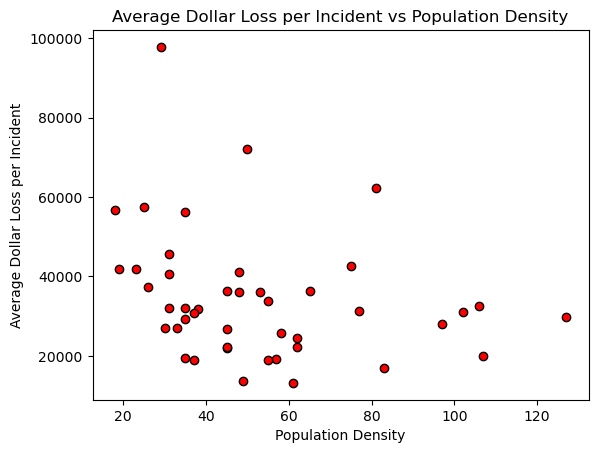

In [58]:
#Calculate the regression line for average dollar loss per incident and population density
x_values = df2['Population_Density']
y_values = df2['Estimated_Dollar_Loss']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Create a scatter plot of the average dollar loss per incident and population density
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values, regress_values, "b-")
plt.title("Average Dollar Loss per Incident vs Population Density")
plt.xlabel("Population Density")
plt.ylabel("Average Dollar Loss per Incident")
plt.show()




In [59]:
#print the r-squared value and the p-value
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

The r-squared is: nan
The p-value is: nan


In [60]:
#Creating a new dataframe that groups wards by population density and total dollar loss
df3 = df.groupby('Ward_Name')['Population_Density'].mean()
df3 = df3.to_frame()
df3['Total_Dollar_Loss'] = df.groupby('Ward_Name')['Estimated_Dollar_Loss'].sum()
df3.head()

,Population_Density,Total_Dollar_Loss
Ward_Name,,
Beaches-East York,61.0,2928866.0
Beaches-East York 2,62.0,4804523.0
Davenport,77.0,14681139.0
Davenport 2,106.0,15493356.0
Don Valley East,57.0,3583420.0


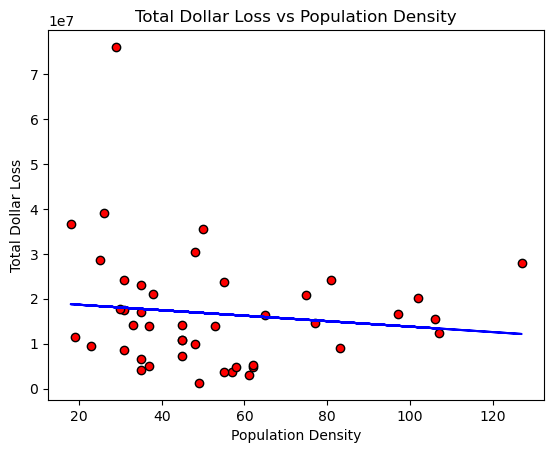

In [61]:
#Calculating the regression line for total dollar loss and population density
x_values = df3['Population_Density']
y_values = df3['Total_Dollar_Loss']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Creating a scatter plot of total dollar loss and population density
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values, regress_values, "b-")
plt.title("Total Dollar Loss vs Population Density")
plt.xlabel("Population Density")
plt.ylabel("Total Dollar Loss")
plt.show()


In [62]:
#Printing the r-squared value and the p-value
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

The r-squared is: 0.014189972351696643
The p-value is: 0.44120227689884284


In [63]:
#Create a dataframe that groups wards by total number of incidents. Include the average population density as a column
df4 = df.groupby('Ward_Name')['Population_Density'].mean()
df4 = df4.to_frame()
df4['Total_Incidents'] = df.groupby('Ward_Name')['_id'].count()
df4.head()



,Population_Density,Total_Incidents
Ward_Name,,
Beaches-East York,61.0,222
Beaches-East York 2,62.0,196
Davenport,77.0,565
Davenport 2,106.0,640
Don Valley East,57.0,187


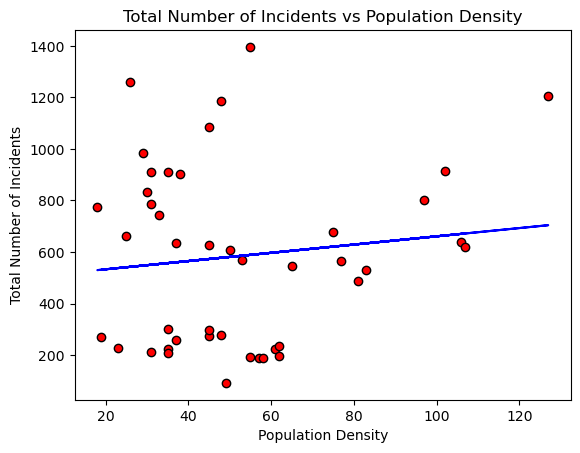

In [64]:
#Calculate the regression line for total number of incidents and population density
x_values = df4['Population_Density']
y_values = df4['Total_Incidents']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Create a scatter plot of total number of incidents and population density
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_values, regress_values, "b-")
plt.title("Total Number of Incidents vs Population Density")
plt.xlabel("Population Density")
plt.ylabel("Total Number of Incidents")
plt.show()

In [65]:
#Print the r-squared value and the p-value
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")


The r-squared is: 0.014297111522660782
The p-value is: 0.43947053599262487
